In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sound1.wav to sound1.wav
User uploaded file "sound1.wav" with length 398184 bytes


### Part 1. Discrete Fourier Transform

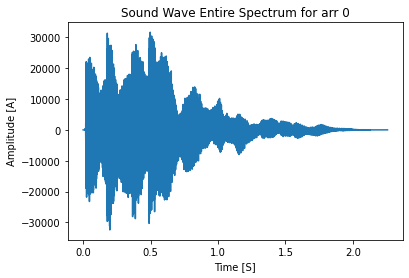

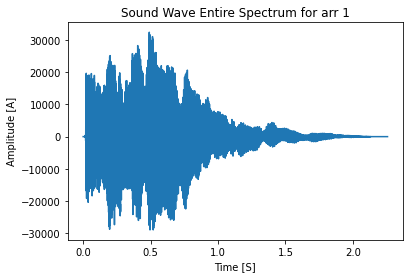

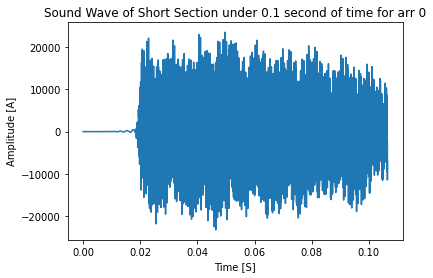

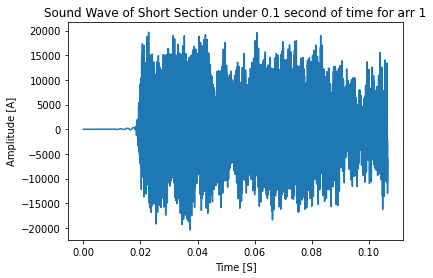

/usr/local/lib/python3.7/dist-packages/numpy/fft/helper.py:162: RuntimeWarning: divide by zero encountered in true_divide
  val = 1.0 / (n * d)
/usr/local/lib/python3.7/dist-packages/numpy/fft/helper.py:169: RuntimeWarning: invalid value encountered in multiply
  return results * val
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: ComplexWarning: Casting complex values to real discards the imaginary part


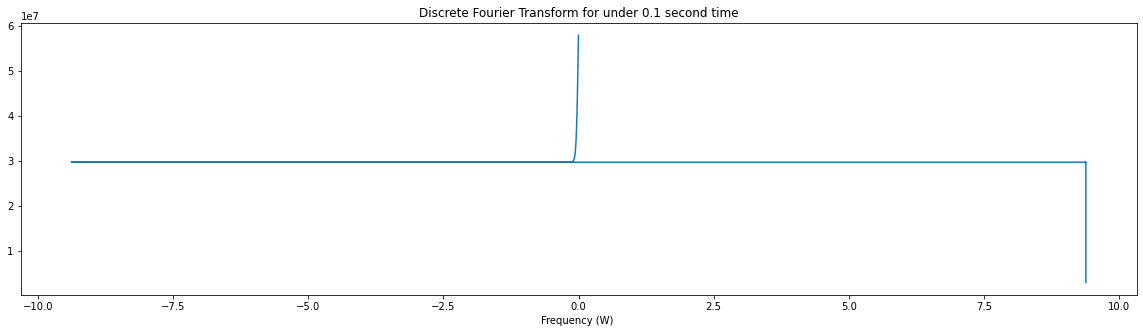

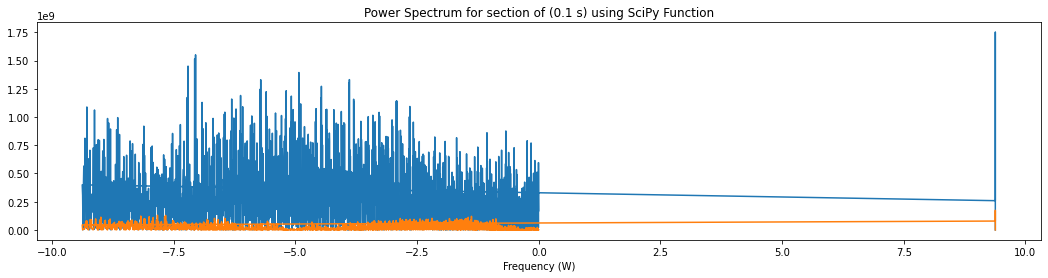

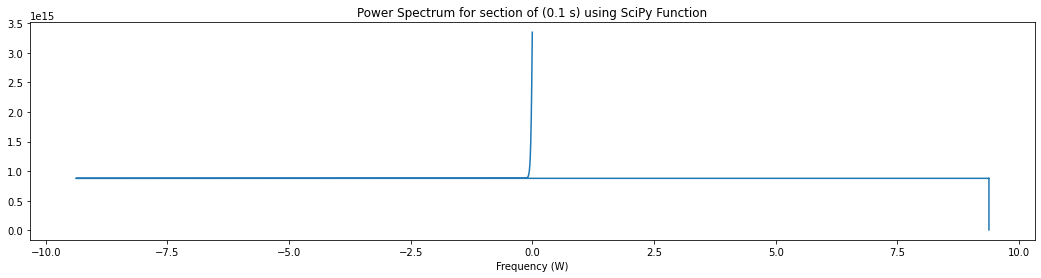

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: RuntimeWarning: invalid value encountered in double_scalars


Power law exponents: arr_one = 3.809400E-02, k = 1.0 for $f(arr_a) = ax^k$


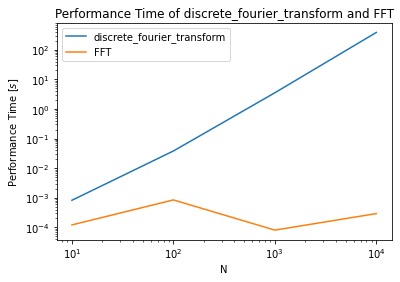

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


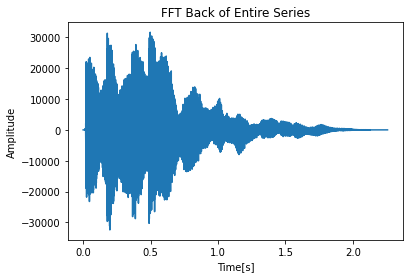

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


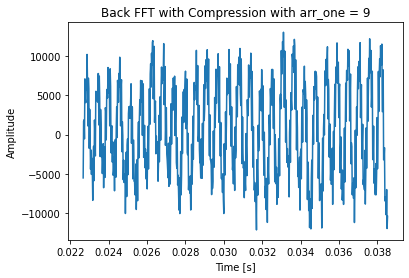

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


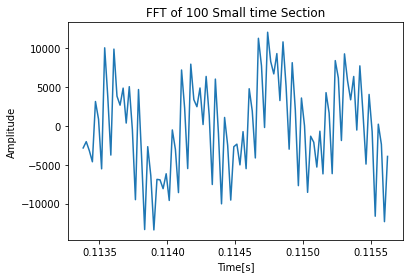

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
import time
import scipy.optimize as opt


# Plots. 

# Plot of the Whole Spectrum.

def plot1(time_length, data):

  k = np.shape(data)

  for i in range(k[1]):

    plt.plot(time_length, data[:,i])
    plt.title('Sound Wave Entire Spectrum for arr %s' %(i))
    plt.xlabel('Time [S]')
    plt.ylabel('Amplitude [A]')

    plt.show()



# Plot of the Spectrum till 0.1 Seconds.

def plot2(section_of_time, section_of_dataA, index_start1, index_end2):

  k = np.shape(section_of_dataA)

  for i in range(k[1]):

    plt.plot(section_of_time, section_of_dataA[:,i])
    plt.title('Sound Wave of Short Section under 0.1 second of time for arr %s' %(i))
    plt.xlabel('Time [S]')
    plt.ylabel('Amplitude [A]')
    plt.show()




def plot3(frequency_fft, DFT_Amplitude_arr):


  plt.figure(figsize=(20, 5))
  plt.title('Discrete Fourier Transform for under 0.1 second time')
  plt.xlabel('Frequency (W) ')
  plt.plot(frequency_fft, DFT_Amplitude_arr)
  plt.show()



def plot4(frequency_fft, power_spectrum):
  
  plt.figure(figsize=(18, 4))
  plt.title('Power Spectrum for section of (0.1 s) using SciPy Function')
  plt.xlabel('Frequency (W)')
  plt.plot(frequency_fft, power_spectrum)
  plt.show()



def plot5(linear_func,N,compute_time_dft,compute_time_fft):

  parameter, pcov = opt.curve_fit(linear_func, N, compute_time_dft)
  print("Power law exponents: arr_one = {:3E}, k = {} for $f(arr_a) = ax^k$".format(parameter[0], parameter[1]))

  plt.loglog(N, compute_time_dft, label='discrete_fourier_transform')
  plt.loglog(N, compute_time_fft, label='FFT')
  plt.title('Performance Time of discrete_fourier_transform and FFT')
  plt.xlabel('N')
  plt.ylabel('Performance Time [$s$]')
  plt.legend()
  plt.show()


def plot6(time_length, backFFT_amp_arr):

  plt.title('FFT Back of Entire Series')
  plt.xlabel('Time[s]')
  plt.ylabel('Amplitude')
  plt.plot(time_length, backFFT_amp_arr)
  plt.show()


def plot7(section_of_time2, backFFT_amp_arr,a_i):

  plt.plot(section_of_time2, backFFT_amp_arr)
  plt.title('Back FFT with Compression with arr_one = %s' %(a_i))
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')
  plt.show()    

def plot8(short_section_1, fft_back_1):

  plt.title('FFT of 100 Small time Section')
  plt.xlabel('Time[s]')
  plt.ylabel('Amplitude')
  plt.plot(short_section_1, fft_back_1)
  plt.show()




# Code and Data Analysis


# Solution to Question 1 : 

samplerate, data = wavfile.read('sound1.wav') # sound1 is arr_one C piano note.
total_length = data.shape[0] / samplerate 
time_length = np.linspace(0, total_length, data.shape[0])



# Solution to Question 2 : 


# Plot of the entire spectrum. 

plot1(time_length, data)


# Plot of the only time 0.1 sec

index_start1, index_end1 = 0, 4700          #************************
section_of_time1 = time_length[index_start1:index_end1]
section_of_data1 = data[index_start1:index_end1]#[:,0]

plot2(section_of_time1, section_of_data1, index_start1, index_end1)



# Solution to Question 3 : 


section_of_data2 = data[index_start1:index_end1][:,0]

frequency_fft = np.fft.fftfreq(section_of_data1[:,0].size, section_of_time1)



N, W = index_end1 - index_start1, []

for i in range(N):

    W = np.append( W, (np.exp((-2j * np.pi * i) / N)) )


def discrete_fourier_transform(arr_a, N):

    arr_amp = [] # DFT Amplitude Array 
    total_sum = 0

    for i in range(N):
        for j in range(N):
            total_sum = total_sum + (arr_a[j] * math.pow(W[i],j))

        arr_amp = np.append(arr_amp, total_sum)
    return arr_amp



DFT_Amplitude_arr = discrete_fourier_transform(section_of_data1[:,0], N)


plot3(frequency_fft, DFT_Amplitude_arr)


# Solution to Question 4 :



fourier_tranform_arr = fft(section_of_data1)

power_spectrum1 = np.abs(fourier_tranform_arr)**2

max_freq = max(frequency_fft)

power_spectrum2 = np.abs(DFT_Amplitude_arr)**2

plot4(frequency_fft, power_spectrum1)
plot4(frequency_fft, power_spectrum2)



# Problem 5

def linear_func(arr_one, arr_a, k):
    return arr_one*arr_a**k

arr_one = np.arange(1, 5)
N = [10**i for i in arr_one]

compute_time_dft, compute_time_fft = [], []


for i in N:

    data_section_arr = data[index_start1:index_start1 + i][:,0]

    W = []  # Omega

    for j in range(i):
        W = np.append(W , (np.exp(-2j * np.pi * j/i)))
    
    dft_time_counter1 = time.perf_counter()
    DFT_Amplitude_arr = discrete_fourier_transform(data_section_arr, i)
    
    dft_time_counter2 = time.perf_counter()
    compute_time_dft = np.append(compute_time_dft, dft_time_counter2-dft_time_counter1)
    t_fft_counter_1 = time.perf_counter()
    fourier_tranform_arr = fft(data_section_arr)
    t_fft_counter_2 = time.perf_counter()
    compute_time_fft.append(t_fft_counter_2-t_fft_counter_1)

plot5(linear_func,N,compute_time_dft,compute_time_fft)



index_start1, index_end1 = 0, len(time_length)
data_section_arr = data[index_start1:index_end1][:,0]

frequency_data = fft(data_section_arr)
backFFT_amp_arr = ifft(frequency_data)

plot6(time_length, backFFT_amp_arr)




# Problem 6

arr_one = np.arange(1, 10)

for i in arr_one:
  f_a = [1 - (1/2)**(i)]  

N = len(frequency_data)

psd_arr = np.conjugate(frequency_data) *  frequency_data # Power Spectral density
spectrum_sort_arr = [(j, i) for i, j in enumerate(psd_arr)]
spectrum_sort_arr.sort(key = lambda arr_a: arr_a[0])
sorted_indices = [i[1] for i in spectrum_sort_arr]



for i in f_a:
  
    index_set = sorted_indices[:int(N * i)]
    np.put(frequency_data, index_set, np.zeros(1))
    backFFT_amp_arr = ifft(frequency_data)
    
    index_start2, index_end2 = 1000, 1700
    section_of_time2 = time_length[index_start2:index_end2]

    # Calculate the value of arr_one from f_a

    a_i = int(np.log(1-i)/np.log(1/2))

    wavfile.write('Back_FFT{}.wav'.format(a_i), samplerate, section_of_time2)

    plot7(section_of_time2, backFFT_amp_arr[index_start2:index_end2] , a_i)




# Problem 7


index_start3, index_end3 = 5000, 5100
arr1_section_1 = data[index_start3:index_end3][:,0]
short_section_1 = time_length[index_start3:index_end3]
fft_1 = fft(arr1_section_1)
fft_back_1 = ifft(fft_1)

plot8(short_section_1, fft_back_1)


Report 


The short time section of 0.1 s, shows periodic graph thus frequency can be calculated in the presence of the velocity, which in turn can be calculated by determining the wavelength. But from power spectrum graph, frequency can be determined and it also matches the prediciton of amplitude-time graph of the short section.


The maximum frequency was observed at 0 Hz and 9 Hz. Same results were also obtained using the own Discrete Fourier Transform and power spectrum, which was further confirmed with from built in functions of FFT from SciPy. 



From the graph of FFT back to the time domain, it is evident that we have recovered the original data as the graph matches with the original one.


Now using the back FFT, we can observe that the data was retrived again using the graph but with the presence of some noise in some places. 
When the data was compressed the short section showed more smooth data but again some distortions and noise were seen.


Comparing the back FFT of different short sections, it is found that both samples are quite similar as predicted by Shannon-Nyquist theorem.

